### 1. Metadata  
This synthetic dataset is designed to study and predict Myers-Briggs Type Indicator (MBTI) personality types based on a combination of demographic factors, areas of interest, and personality measures. 

- **Age**: A continuous variable representing the age of the individual.  
- **Gender**: A categorical variable indicating the gender of the individual. Possible values are 'Male' and 'Female'.  
- **Education**: A binary variable, A value of 1 indicates the individual has at least a graduate-level education (or higher), and 0 indicates an undergraduate, high school level or Uneducated.
- **Interest**: A categorical variable representing the individual's primary area of interest.
- **Introversion Score:**: A continuous variable ranging from 0 to 10, representing the individual's tendency toward introversion versus extraversion. Higher scores indicate a greater tendency toward extraversion. 
- **Sensing Score:**: A continuous variable ranging from 0 to 10, representing the individual's preference for sensing versus intuition. Higher scores indicate a preference for sensing.
- **Thinking Score:**: A continuous variable ranging from 0 to 10, indicating the individual's preference for thinking versus feeling. Higher scores indicate a preference for thinking.  
- **Judging Score:**: A continuous variable ranging from 0 to 10, representing the individual's preference for judging versus perceiving. Higher scores indicate a preference for judging. 
- **Personality**: Target that contains People Personality Type  

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# Define the column names as a list
column_names = ['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score', 'Thinking Score', 
                'Judging Score', 'Interest', 'Presonality']

### 2. Load Dataset

In [3]:
dataset = pd.read_csv("dataset/data.csv", names = column_names, sep = ",", skipinitialspace=True)
dataset.head()

C:\Users\aldem\AppData\Local\Temp\ipykernel_18928\907062243.py:1: DtypeWarning: Columns (0,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("dataset/data.csv", names = column_names, sep = ",", skipinitialspace=True)


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Presonality
0,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
1,19.0,Male,0,9.4708,7.141433769040908,6.03696,4.360278347246059,Unknown,ENFP
2,27.0,Female,0,5.85392,6.160195143997459,0.80552,4.221421070826066,Sports,ESFP
3,21.0,Female,0,7.08615,3.388433120634816,2.66188,5.127319577123164,Unknown,ENFP
4,28.0,Male,0,2.01892,4.823624399390112,7.30625,5.986550261243721,Others,INTP


In [4]:
# let's look at the size of the data (number of rows, columns):
dataset.shape

(128062, 9)

In [5]:
# This method shows us the number of rows in the column - count, the mean value of the column - mean,
# the standard deviation column - std, the minimum (min) and maximum (max) values, as well as the
# boundary of each quartile - 25%, 50% and 75%.
# by default, the describe( ) method skips rows and columns that do not contain numbers - categorical features.
# To include a summary for all columns, you need to add an argument in brackets - include = "all"
dataset.describe(include = "all")

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Presonality
count,128062,128062,128062,128062.00000,128062,128062,128062.0,128062,128062
unique,74,3,5,124074.00000,128056,124041,127726.0,6,17
top,22.0,Male,0,4.29957,0.0,9.29488,0.0,Unknown,ENFP
freq,6128,70432,38565,3.00000,6,3,175.0,48835,34404


In [6]:
# look at the info
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128062 entries, 0 to 128061
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Age                 128062 non-null  object
 1   Gender              128062 non-null  object
 2   Education           128062 non-null  object
 3   Introversion Score  128062 non-null  object
 4   Sensing Score       128062 non-null  object
 5   Thinking Score      128062 non-null  object
 6   Judging Score       128062 non-null  object
 7   Interest            128062 non-null  object
 8   Presonality         128062 non-null  object
dtypes: object(9)
memory usage: 8.8+ MB
None


we see that the number of rows in all columns is 128062, which is equal to the number of rows in the entire table. This means that there are no missing values in the table.

In [7]:
missing_data = dataset.isnull().sum()
print(missing_data)

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Presonality           0
dtype: int64


again we see that there are no missing values

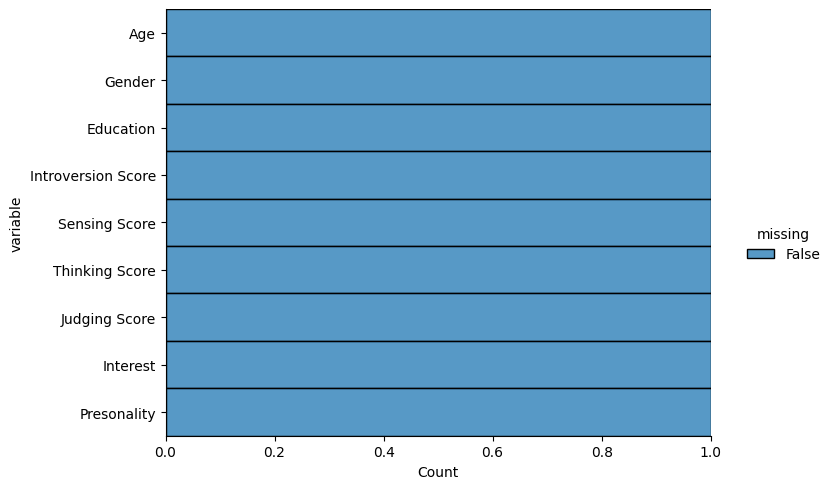

In [8]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

The graph also shows that there are no missing values.

### 3. Conducting descriptive statistical analysis of numerical variables

#### plotting a frequency histogram

In [9]:
# list of numerical variables 
numerical_cols = ["Age", "Education","Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"]

In [20]:
dataset = dataset.dropna(subset=numerical_cols)

In [21]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [22]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='coerce')
dataset['Education'] = pd.to_numeric(dataset['Education'], errors='coerce')
dataset['Introversion Score'] = pd.to_numeric(dataset['Introversion Score'], errors='coerce')
dataset['Sensing Score'] = pd.to_numeric(dataset['Sensing Score'], errors='coerce')
dataset['Thinking Score'] = pd.to_numeric(dataset['Thinking Score'], errors='coerce')
dataset['Judging Score'] = pd.to_numeric(dataset['Judging Score'], errors='coerce')

In [23]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    # Check for numeric data and gaps
    if not pd.api.types.is_numeric_dtype(data[column]):
        raise TypeError(f"The column {column} must contain numerical values.")
    sbn.histplot(data[column], color="blue", bins=bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title(f"Histogram distribution for {column}")
    plt.show()



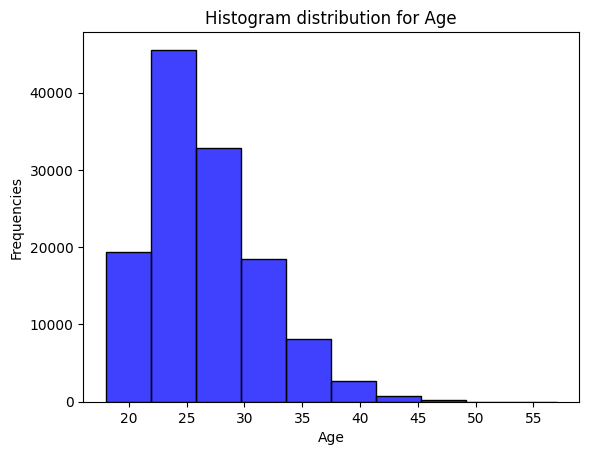

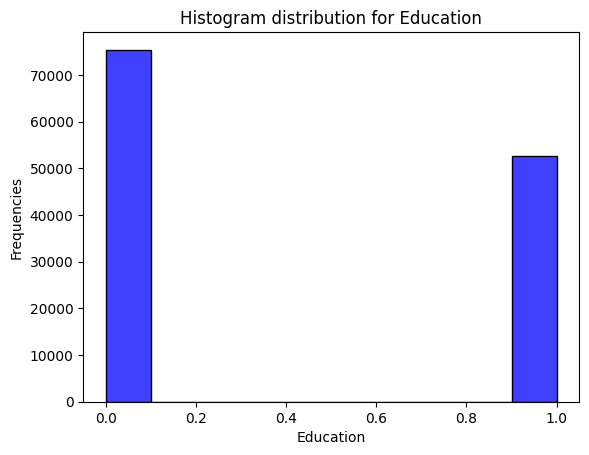

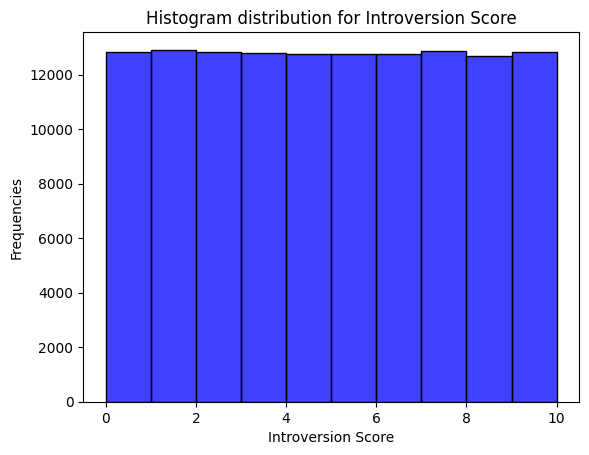

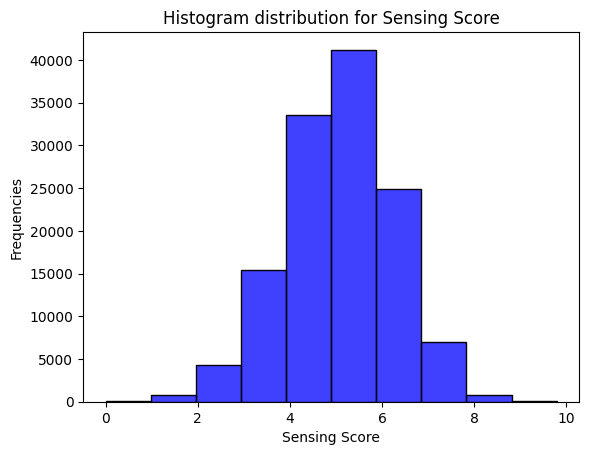

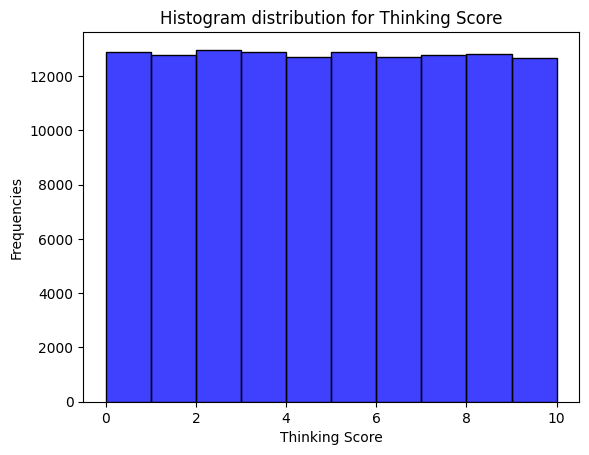

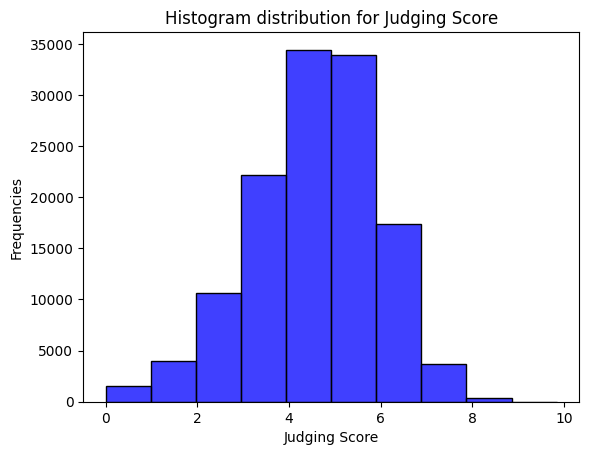

In [24]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

#### plotting a density histogram

In [25]:
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()


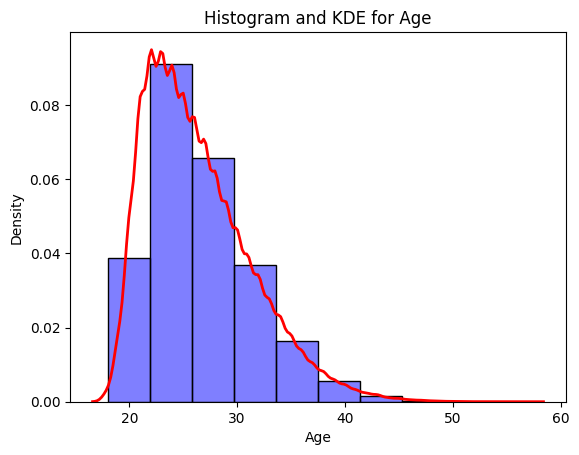

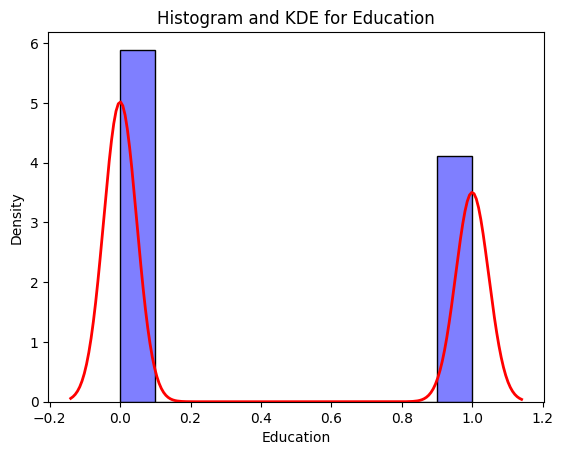

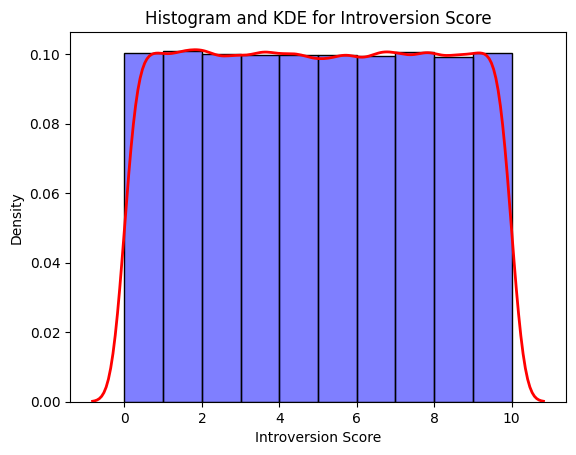

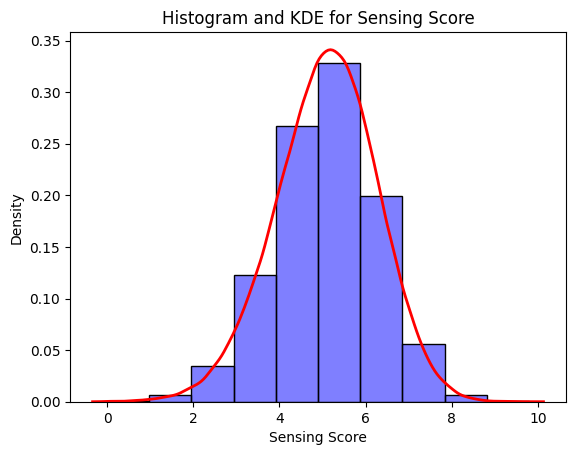

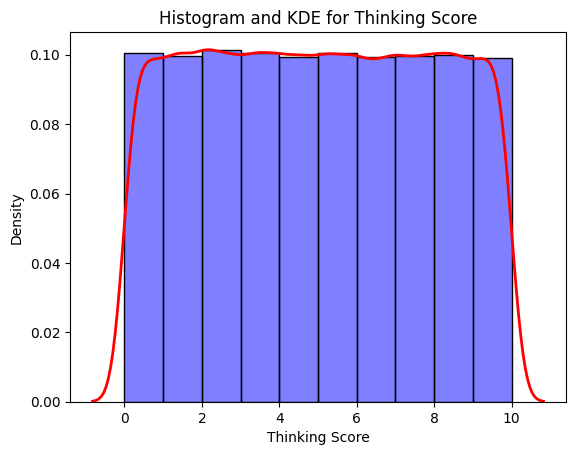

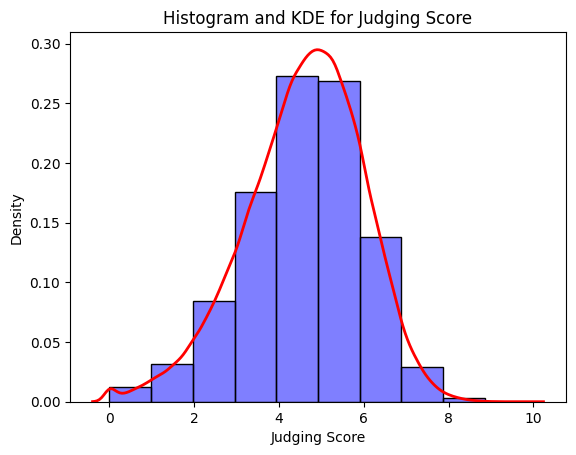

In [26]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

#### plotting a span diagram

In [27]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

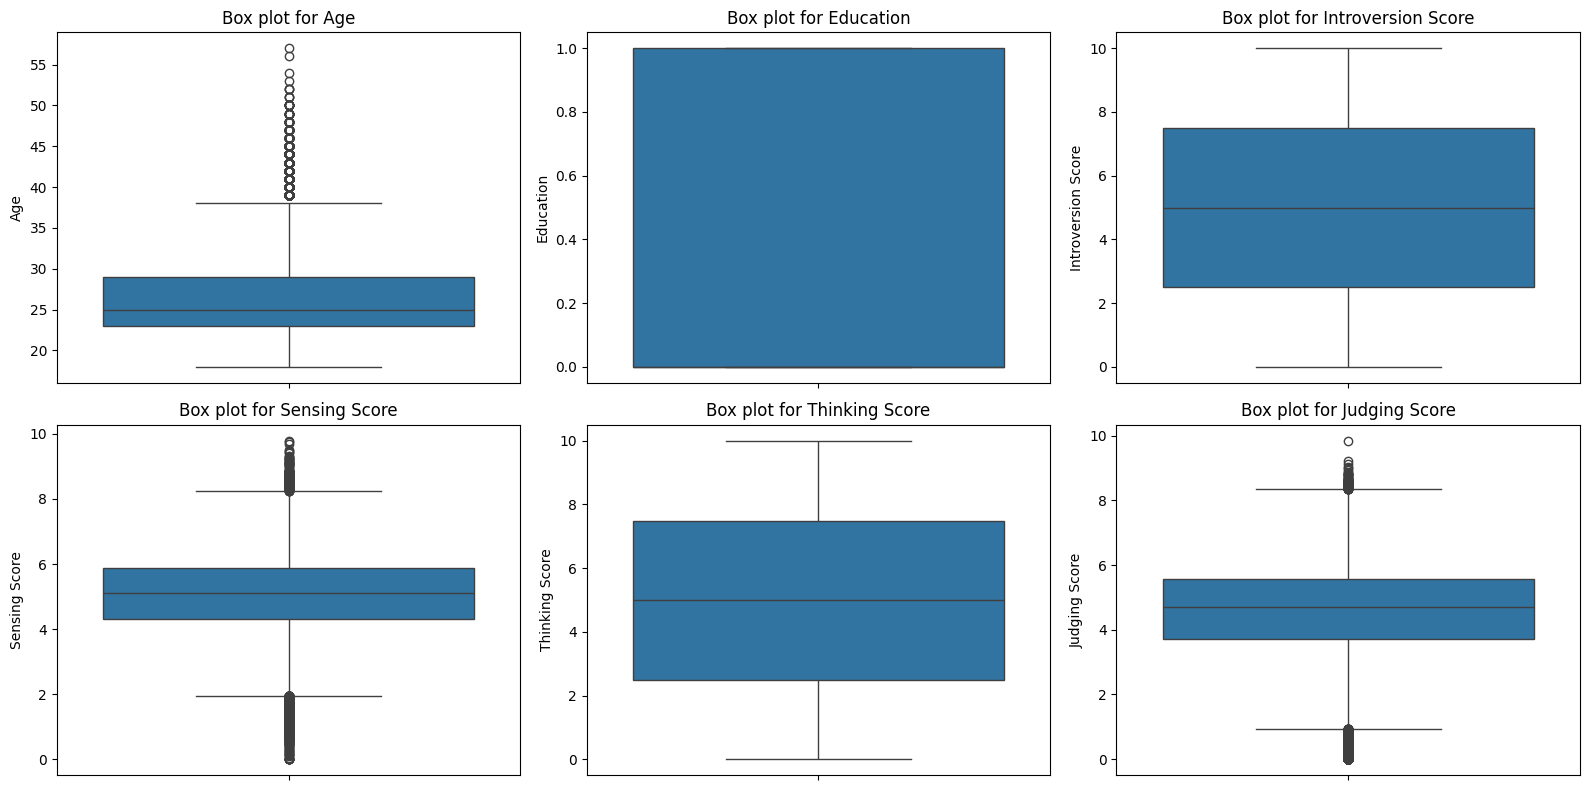

In [28]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

#### calculation of statistical indicators

statistical information about numerical variables already there above in the first point

#### construction of a correlation table of numerical characteristics and identification of outliers

In [29]:
print(dataset.isnull().sum())

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Presonality           0
dtype: int64


In [30]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

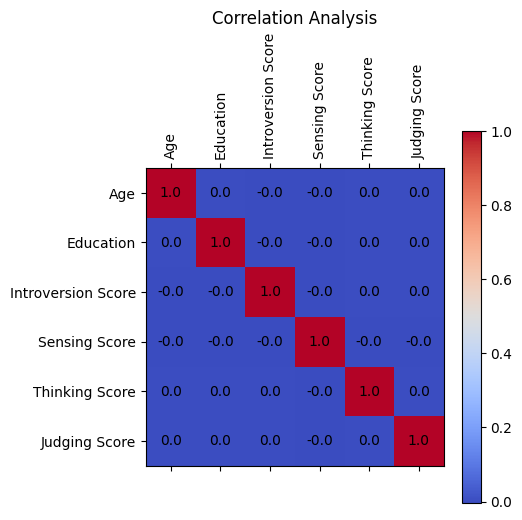

In [31]:
plot_correlation(dataset, numerical_cols)

In [32]:
for col in numerical_cols:
    print(f"{col}: {dataset[col].unique()}")

Age: [19. 27. 21. 28. 36. 25. 26. 29. 24. 20. 23. 34. 22. 35. 31. 30. 38. 32.
 39. 47. 18. 33. 37. 46. 44. 40. 41. 42. 43. 45. 49. 48. 51. 56. 50. 54.
 53. 52. 57.]
Education: [0. 1.]
Introversion Score: [9.4708  5.85392 7.08615 ... 8.16219 9.37782 7.78827]
Sensing Score: [7.14143377 6.16019514 3.38843312 ... 3.4338567  5.07744346 4.77073724]
Thinking Score: [6.03696 0.80552 2.66188 ... 2.45531 1.79598 3.186  ]
Judging Score: [4.36027835 4.22142107 5.12731958 ... 5.54114406 6.76264343 6.20435492]


Possible reasons for this result:
The data does not vary: If the values ​​in one or more columns are constant or nearly constant, the correlation will be close to zero because there is no change that could demonstrate a relationship.

Numbers may be coded as categories: If the data are coded categories rather than true numeric values ​​(e.g. 0 and 1 may represent categories), this can also result in no correlation.


#### outlier detection


In [33]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

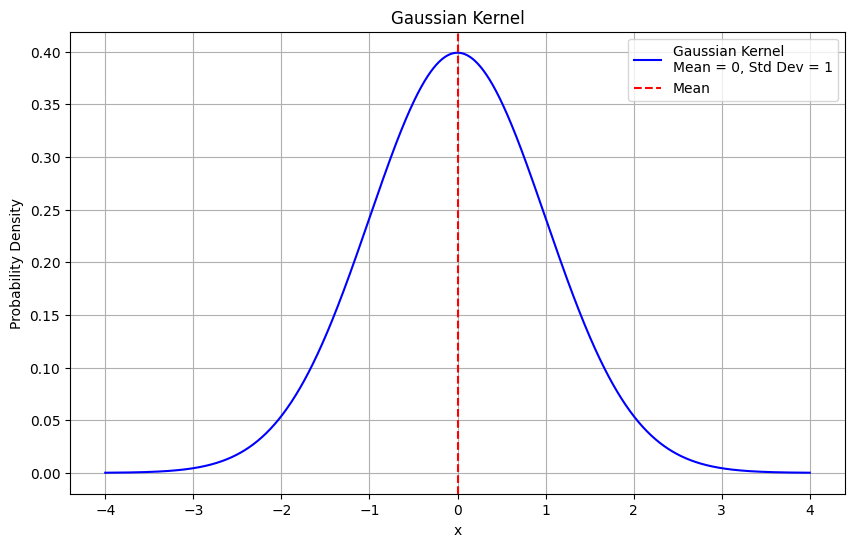

In [34]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [35]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [36]:
call_percentile(z = -2)


2.275

In [37]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [38]:
outliers_detection(dataset, "Age").head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Presonality
1,19.0,Male,0.0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
57,39.0,Male,1.0,8.74006,4.737347,1.09096,2.318051,Others,ENFP
68,47.0,Female,0.0,5.06147,6.749663,1.80485,4.089199,Unknown,ESFP
75,47.0,Female,0.0,2.61080,2.941643,3.68599,4.220359,Unknown,INFP
119,18.0,Female,1.0,1.33374,4.783156,8.41633,2.945933,Arts,INTP


In [39]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Age ***
#samples outlier to distribution = 5279
%outliers = 4.12 %

*** Outliers detection in Education ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Introversion Score ***
#samples outlier to distribution = 5828
%outliers = 4.55 %

*** Outliers detection in Sensing Score ***
#samples outlier to distribution = 5828
%outliers = 4.55 %

*** Outliers detection in Thinking Score ***
#samples outlier to distribution = 5828
%outliers = 4.55 %

*** Outliers detection in Judging Score ***
#samples outlier to distribution = 5828
%outliers = 4.55 %


#### Categorical Variables

In [40]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['Presonality', 'Interest', 'Gender']

In [41]:
for col in categorical_vars:
    print(dataset[col].unique())

['ENFP' 'ESFP' 'INTP' 'INFP' 'ENFJ' 'ENTP' 'ESTP' 'ISTP' 'INTJ' 'INFJ'
 'ISFP' 'ENTJ' 'ESFJ' 'ISFJ' 'ISTJ' 'ESTJ']
['Unknown' 'Sports' 'Others' 'Technology' 'Arts']
['Male' 'Female']


In [42]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts(dropna=False).reset_index())


***** Presonality ******
   Presonality  count
0         ENFP  34404
1         ENTP  24718
2         INFP  24711
3         INTP  17132
4         ESFP   4832
5         ENFJ   3883
6         ISFP   3456
7         ESTP   3334
8         INFJ   2919
9         ENTJ   2783
10        ISTP   2390
11        INTJ   1920
12        ESFJ    554
13        ESTJ    392
14        ISFJ    371
15        ISTJ    262

***** Interest ******
     Interest  count
0     Unknown  48835
1        Arts  25489
2      Others  21733
3  Technology  19103
4      Sports  12901

***** Gender ******
   Gender  count
0    Male  70432
1  Female  57629


### 4. Descriptive statistical analysis for categorical variables


#### a bar chart with absolute frequencies for each instance

In [43]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

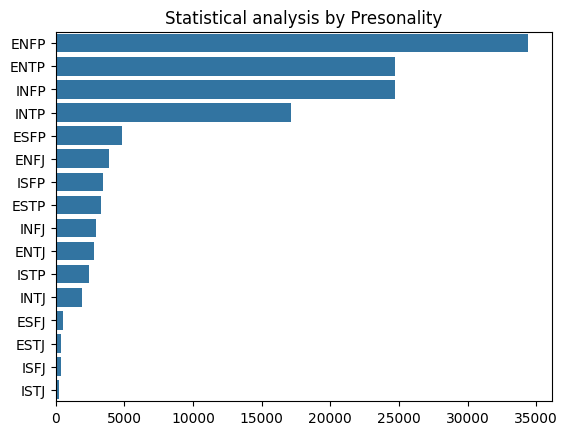

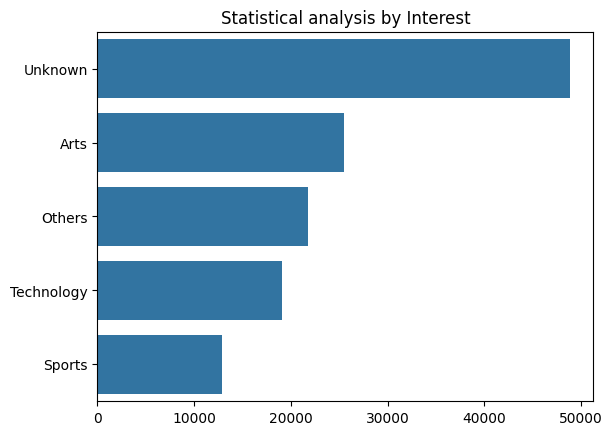

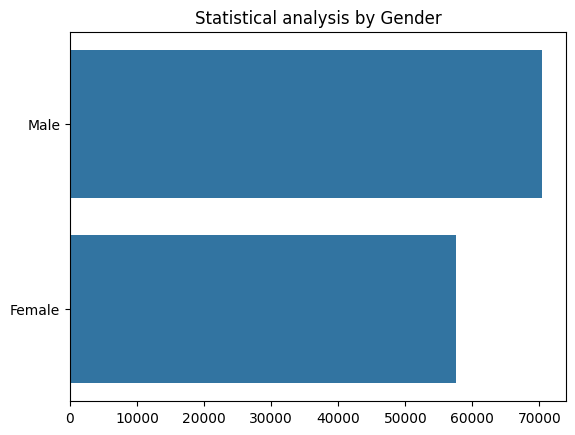

In [44]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

#### a pie chart with relative frequencies for each instance

In [45]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

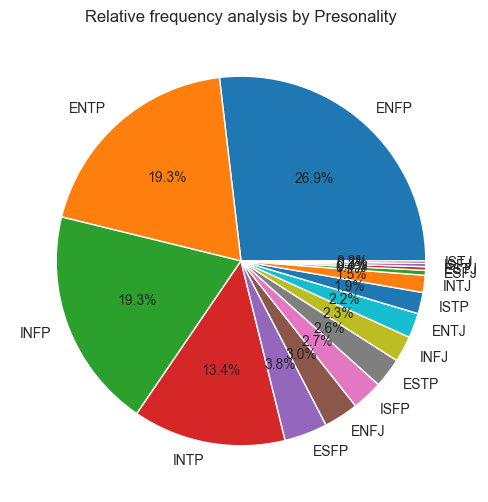

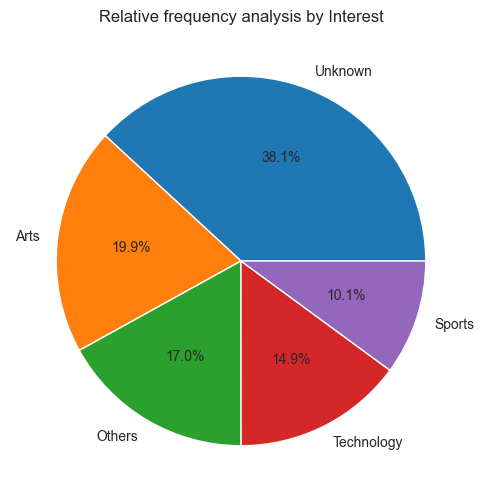

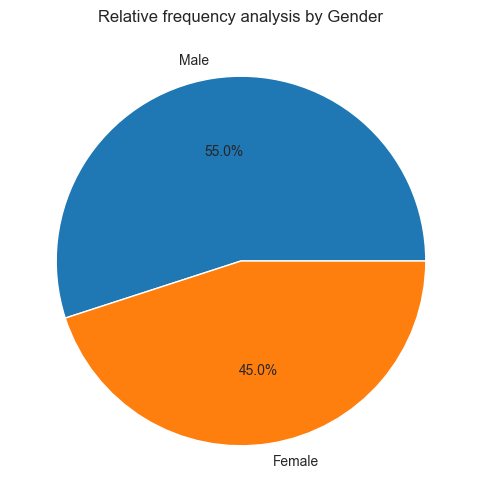

In [46]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

### 5. Descriptive statistical analysis for groups of categorical variables

In [47]:
# create groups organized by gender and personality
group_gender_personality = dataset.groupby(["Gender", "Presonality"]).size().reset_index(name = "samples")
print(group_gender_personality)

    Gender Presonality  samples
0   Female        ENFJ     1770
1   Female        ENFP    15509
2   Female        ENTJ     1526
3   Female        ENTP    13537
4   Female        ESFJ      237
5   Female        ESFP     2128
6   Female        ESTJ      215
7   Female        ESTP     1896
8   Female        INFJ     1003
9   Female        INFP     8762
10  Female        INTJ      868
11  Female        INTP     7665
12  Female        ISFJ      126
13  Female        ISFP     1215
14  Female        ISTJ      121
15  Female        ISTP     1051
16    Male        ENFJ     2113
17    Male        ENFP    18895
18    Male        ENTJ     1257
19    Male        ENTP    11181
20    Male        ESFJ      317
21    Male        ESFP     2704
22    Male        ESTJ      177
23    Male        ESTP     1438
24    Male        INFJ     1916
25    Male        INFP    15949
26    Male        INTJ     1052
27    Male        INTP     9467
28    Male        ISFJ      245
29    Male        ISFP     2241
30    Ma

#### grouped absolute frequencies using a bar chart

In [48]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Gender')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Gender and Personality')
    plt.tight_layout()
    plt.show()

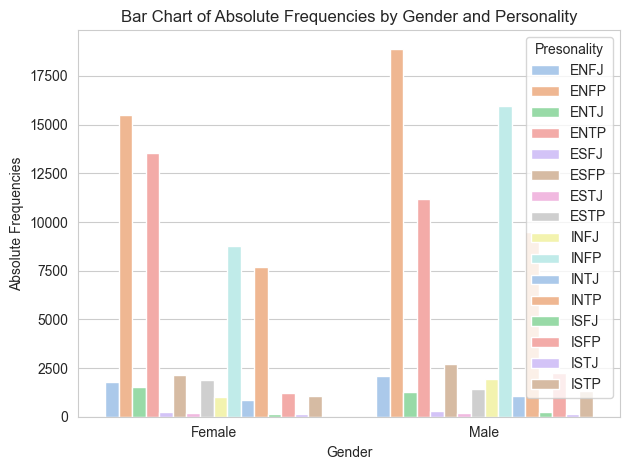

In [49]:
plot_absfreq_groups(group_gender_personality, "Gender", "Presonality")

From the diagram we see that most people have the ENFP personality type regardless of gender. Also, the least number of people with the ISTJ personality type, and there is also no dependence on the person's gender. Thus, we find that the personality type is practically independent of gender. Why practically does not depend? Because among men, after ENFP, the INFP personality type prevails, and among women, the ISFP.

#### grouped relative frequencies using a pie chart

In [50]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " Gender " + group[g2]
    sizes = group["samples"]
    
    plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  
    plt.title('Pie Chart of Relative Frequencies by Gender and Personality')
    
    plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    
    plt.show()

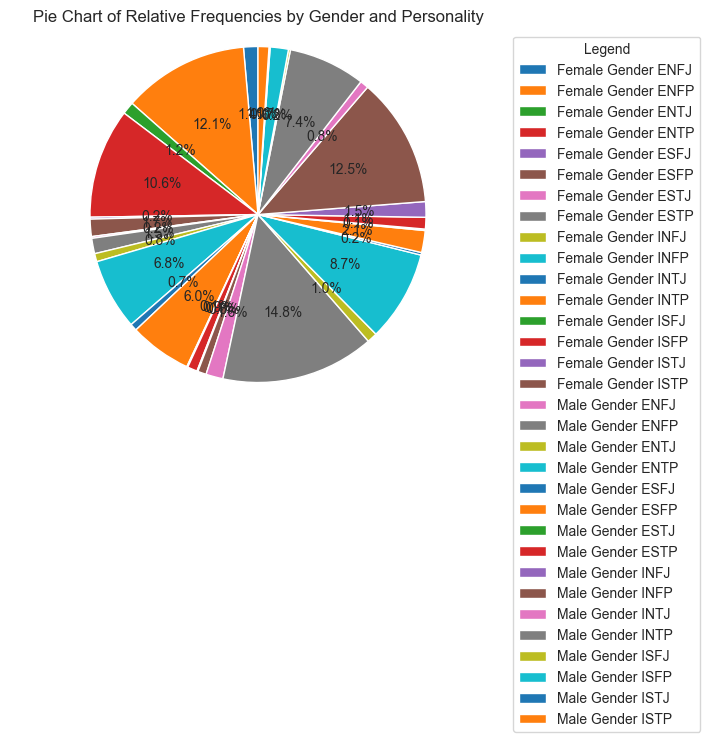

In [51]:
plot_relfreq_groups(group_gender_personality, "Gender", "Presonality")

The pie chart shows the percentage of each type among a given gender.